In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [7]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

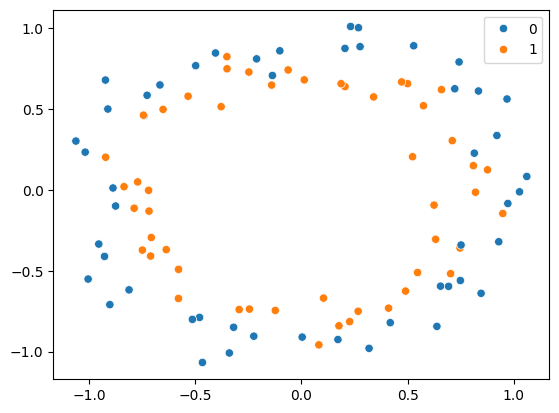

In [8]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [14]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

**EARLY STOPPING**

In [10]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
callback = EarlyStopping(
    monitor="val_loss",#konsi quantity ke upar monitor krna early stopping
    min_delta=0.00001,#min change in the monitored quantity to qualify as an improvement
    patience=20,# No.. of epochs with no improvement after which training will be stopped
    verbose=1, # jo end pe show horha h kis epoch pe early stopping is occuring it won't show now
    mode="auto",
    baseline=None,# Training will stop if the model doesn't shows improvement over the baseline
    restore_best_weights=False
)

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.4617 - loss: 0.6960 - val_accuracy: 0.6000 - val_loss: 0.6873
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5117 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5195 - loss: 0.6904 - val_accuracy: 0.4000 - val_loss: 0.6949
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5383 - loss: 0.6903 - val_accuracy: 0.4000 - val_loss: 0.6963
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5648 - loss: 0.6895 - val_accuracy: 0.4000 - val_loss: 0.6976
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6094 - loss: 0.6851 - val_accuracy: 0.4000 - val_loss: 0.6992
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5289 - loss: 0.6877 - val_accuracy: 0.4000 - val_loss: 0.7002
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5578 - loss: 0.6850 - val_accuracy: 0.4500 - v

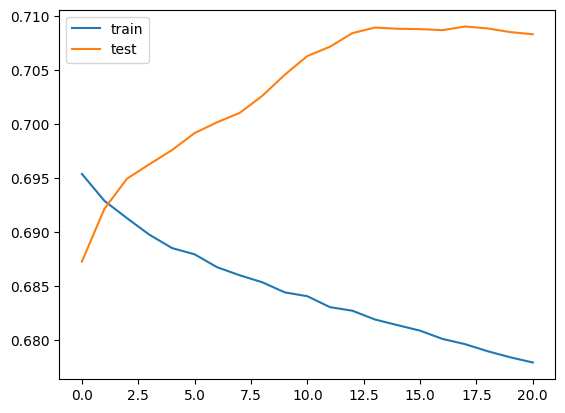

In [14]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()